In [1]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('/content/Breast_Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape   #Rows - 569  and  Columns - 33

(569, 33)

In [4]:
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
# Label encoding: converts categorical diagnosis values into numerical format
# M (Malignant) → 1, B (Benign) → 0 for binary classification models


In [5]:
df.head()  # Successfully changed

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


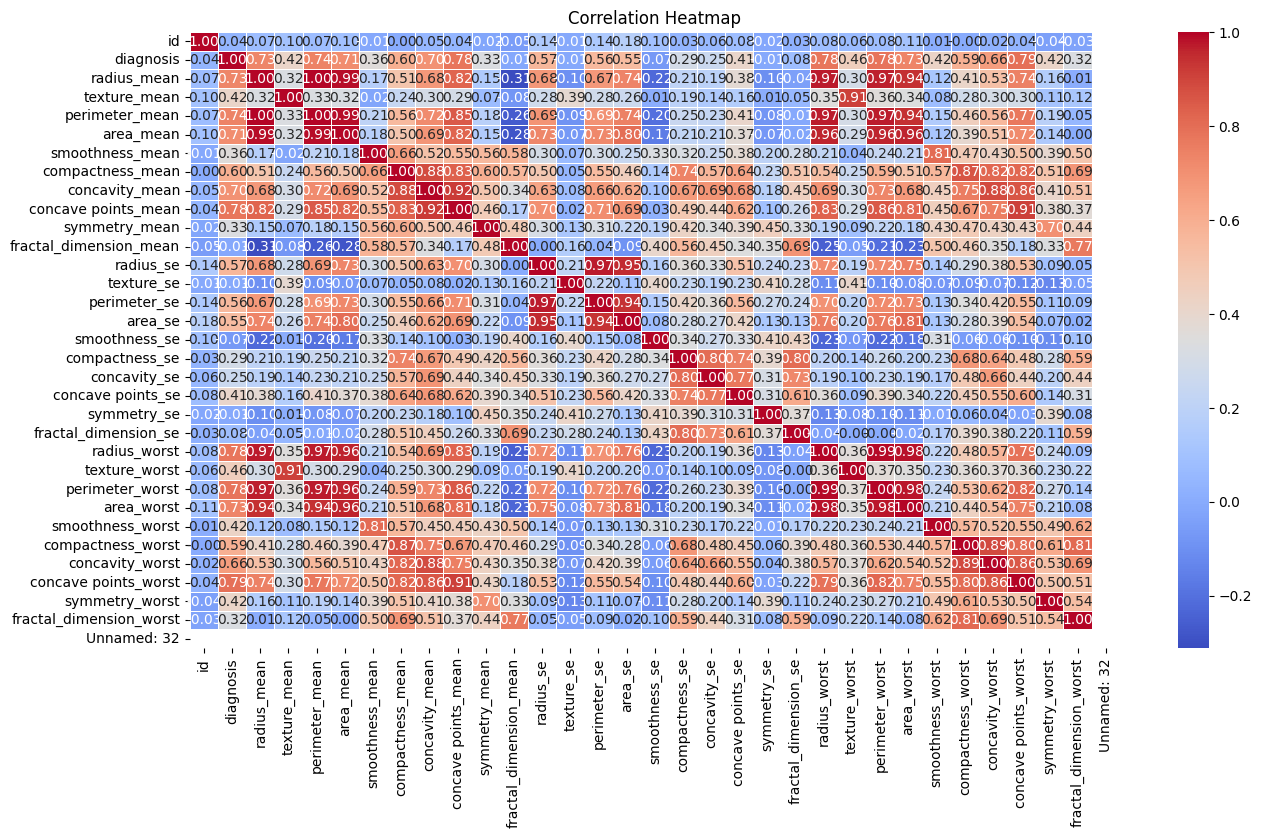

In [6]:
# Calculate correlation matrix for all numerical columns
corr = df.corr()

# Set figure size for better visibility
plt.figure(figsize=(15, 8))

# Plot heatmap to visualize correlation between features
sns.heatmap(
    corr,
    annot=True,          # Display correlation values inside cells
    cmap='coolwarm',     # Color map to show positive/negative correlation
    fmt=".2f",           # Format values to 2 decimal places
    linewidths=0.5       # Add lines between cells for clarity
)

# Add title to the plot
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


In [7]:
#Difficult to Under the above graph
#Sorted corr accoding  to each column

# Calculate correlation with diagnosis
corr_table = df.corr()['diagnosis'].reset_index()

# Rename columns for clarity
corr_table.columns = ['Feature', 'Correlation_with_Diagnosis']

# Sort by correlation value
corr_table = corr_table.sort_values(
    by='Correlation_with_Diagnosis', ascending=False
)

corr_table


,Feature,Correlation_with_Diagnosis
1,diagnosis,1.000000
29,concave points_worst,0.793566
24,perimeter_worst,0.782914
9,concave points_mean,0.776614
22,radius_worst,0.776454
4,perimeter_mean,0.742636
25,area_worst,0.733825
2,radius_mean,0.730029
5,area_mean,0.708984
8,concavity_mean,0.696360


In [8]:
# Remove columns that have very low correlation with the diagnosis column
# These features contribute less to the prediction and may add noise to the model
df = df.drop(
    columns=[
        'symmetry_se',
        'fractal_dimension_mean',
        'smoothness_se',
        'texture_se',
        'fractal_dimension_se',
        'id',
        'Unnamed: 32'
    ],
    axis=1
)


In [9]:
df.info()  #There is no NaN values in any column & Each column is in Numerical Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

In [10]:
# Separate independent variables (features) and dependent variable (target)
X = df.drop(columns=['diagnosis'])   # All input features
y = df[['diagnosis']]                # Target variable (Malignant / Benign)


In [11]:
# Check the dimensions of features and target
X.shape, y.shape


((569, 25), (569, 1))

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# 70% data for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42   # Ensures reproducibility
)


In [13]:
# Verify the shapes after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 25), (171, 25), (398, 1), (171, 1))

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()

# Fit scaler only on training data to avoid data leakage
X_train = scaler.fit_transform(X_train)

# Apply the same scaling parameters to test data
X_test = scaler.transform(X_test)


In [15]:
print(X_train)
print('*'*50)
print(X_test)
print('*'*50)

[[0.29624369 0.27730808 0.28381849 ... 0.21839623 0.15474078 0.12800949]
 [0.27812332 0.22590463 0.26940639 ... 0.32576197 0.09520993 0.18006104]
 [0.34276899 0.14440311 0.355879   ... 0.40203193 0.24876799 0.31400475]
 ...
 [0.32317939 0.2404464  0.29937215 ... 0.12093614 0.17602996 0.05222109]
 [0.30799745 0.33513696 0.3052226  ... 0.66291727 0.31815494 0.42777213]
 [0.21984426 0.36557322 0.20605023 ... 0.2696299  0.22255076 0.11648016]]
**************************************************
[[0.23404672 0.30064254 0.23366153 ... 0.36828737 0.2856298  0.27517803]
 [0.55090847 0.39228948 0.53695776 ... 0.64912917 0.19436231 0.09198033]
 [0.38047897 0.33040243 0.38070776 ... 0.54934688 0.25073921 0.21320787]
 ...
 [0.10837945 0.28238079 0.11601027 ... 0.3595791  0.206781   0.51848084]
 [0.30016161 0.49983091 0.31385559 ... 0.55188679 0.41119653 0.53628349]
 [0.2546158  0.14879946 0.26120148 ... 0.56640058 0.21170905 0.53204476]]
**************************************************


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model using training data
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
from sklearn.metrics import confusion_matrix

# Predict the class labels for the test dataset
y_pred = model.predict(X_test)

# Create confusion matrix to evaluate classification performance
cm = confusion_matrix(y_test, y_pred)


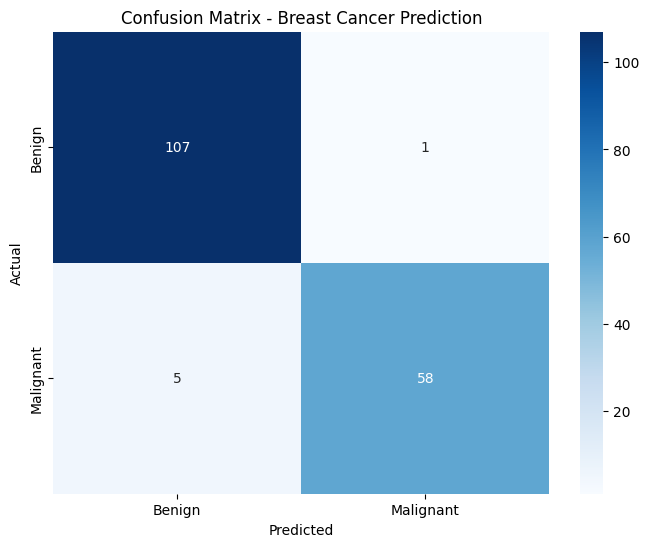

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,          # Display numerical values inside the cells
    fmt='d',             # Integer format
    cmap='Blues',        # Color theme
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer Prediction')
plt.show()


In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9649122807017544


In [20]:
from sklearn.metrics import recall_score, f1_score

# Recall: measures how well the model identifies malignant cases
print("Recall Score:", recall_score(y_test, y_pred))

# F1 Score: harmonic mean of precision and recall
print("F1 Score:", f1_score(y_test, y_pred))


Recall Score: 0.9206349206349206
F1 Score: 0.9508196721311475


In [21]:
#Prediction new Data
new_data = [[
    19.69, 21.25, 130.00, 1203.0, 0.10960,
    0.15990, 0.19740, 0.12790, 0.20690,
    0.05377, 4.585, 94.03, 0.04006,
    0.03832, 0.02058, 25.53, 25.53,
    152.50, 1709.0, 0.14440, 0.42450,
    0.45040, 0.24300, 0.36130, 0.08758
]]


In [22]:
# Scale using trained MinMaxScaler
new_data_scaled = scaler.transform(new_data)

# Predict class
prediction = model.predict(new_data_scaled)

# Get model confidence (probability)
confidence = model.predict_proba(new_data_scaled)



In [23]:
if prediction[0] == 1:
    print("Prediction: Malignant (Cancerous)")
    print(f"Model Confidence: {confidence[0][1]*100:.2f}%")
else:
    print("Prediction: Benign (Non-cancerous)")
    print(f"Model Confidence: {confidence[0][0]*100:.2f}%")


Prediction: Malignant (Cancerous)
Model Confidence: 99.38%


In [24]:
import joblib
joblib.dump(model, 'Breast_Cancer.joblib')
joblib.dump(scaler, 'scaler_Breast_Cancer.joblib')

['scaler_Breast_Cancer.joblib']